<a href="https://colab.research.google.com/github/jumunseong99-hue/boostcourse_assignment/blob/main/w3.4.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-04.ipynb)


* 강좌 보기 : https://www.boostcourse.org/ds214/


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [3]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [4]:
df = pd.read_csv("/content/diabetes_feature.csv")
df.shape

(768, 16)

In [5]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [7]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [8]:
y = df['Outcome']
y.shape

(768,)

In [9]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [10]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [11]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

## 머신러닝 알고리즘 사용하기
* [결정 트리 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC)
* [결정 트리 학습법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)
* [랜덤 포레스트 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8)
* [배깅 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B0%B0%EA%B9%85)
<img src="https://upload.wikimedia.org/wikipedia/commons/8/83/0_jW2hAGmYEFH0RP9W.png">

이미지 출처 : https://upload.wikimedia.org/wikipedia/commons/8/83/0_jW2hAGmYEFH0RP9W.png

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

In [47]:
param_distributions = {"max_depth": max_depth,
"max_features": max_features}

In [48]:
clf = RandomizedSearchCV(estimator,
param_distributions,
n_iter=100,
scoring="accuracy",
n_jobs=-1,
cv=5,
verbose=2
)

In [50]:
clf.best_params

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params'

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth,
"max_features": max_features}

estimator = GradientBoostingClassifier(random_state=42) # Define the estimator

clf = RandomizedSearchCV(estimator,
param_distributions,
n_iter=100,
scoring="accuracy",
n_jobs=-1,
cv=5,
verbose=2
)

clf.fit(X_train, y_train)

# Access best_params_ after fitting
clf.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
RandomForestClassifier(random_state=42),
GradientBoostingClassifier(random_state=42)
]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [54]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [60]:
df = pd.DataFrame(results,
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
df

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.7043762413800938, 'max_dept...",0.866493,0.87013,"{'mean_fit_time': [0.014006996154785156, 0.009..."


In [63]:
pd.DataFrame(df.loc[1, "cv_result"]).sort_values(by="rank_test_score")

KeyError: 1

###  Single tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_predict = model.predict(X_test)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [26]:
(y_predict != y_test).sum()

np.int64(28)

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8181818181818182

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [29]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [30]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

In [31]:
(y_predict != y_test).sum()

np.int64(24)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8441558441558441

In [33]:
model.feature_importances_

array([1.06409948e-01, 7.31424432e-03, 6.54835292e-02, 3.76351123e-02,
       2.62745825e-02, 9.46514767e-02, 1.56708089e-04, 6.62074399e-01,
       0.00000000e+00])

### Bagging

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model

RandomForestClassifier(random_state=42)

In [35]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
model.feature_importances_

array([0.14724421, 0.04737896, 0.07125703, 0.0915895 , 0.0647634 ,
       0.10255183, 0.01102453, 0.43133793, 0.03285262])

<Axes: >

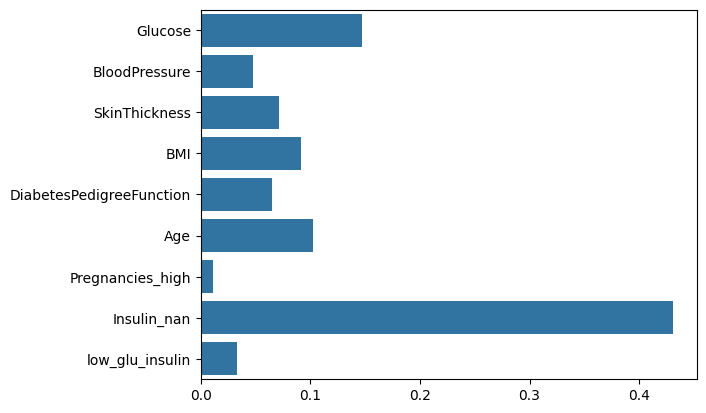

In [37]:
feature_names = X_train.columns.tolist()

sns.barplot(x=model.feature_importances_, y=feature_names)

In [38]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

In [39]:
(y_predict != y_test).sum()

np.int64(20)

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8701298701298701

### Boosting
* https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

<img src="https://quantdare.com/wp-content/uploads/2016/04/bb3.png" width="600">

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

## 학습과 예측하기

In [23]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
model.feature_importances_

array([1.06409948e-01, 7.31424432e-03, 6.54835292e-02, 3.76351123e-02,
       2.62745825e-02, 9.46514767e-02, 1.56708089e-04, 6.62074399e-01,
       0.00000000e+00])

In [17]:
feature_names = X_train.columns.tolist()

<Axes: >

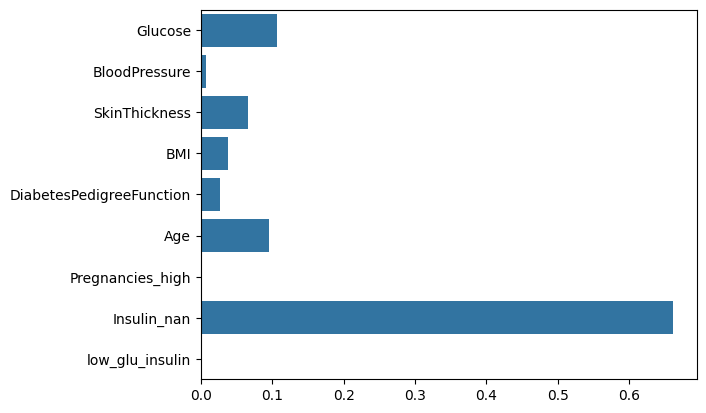

In [18]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [19]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

## 정확도(Accuracy) 측정하기

In [20]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.
# DT : 28
# RF : 20
# GB : 24
(y_predict != y_test).sum()

np.int64(24)

In [21]:
# accuracy score를 구합니다.
# DT: 0.818
# RF: 0.870
# GBL 0.844
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8441558441558441